In [2]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 81.1 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import gensim
from gensim.models import Word2Vec

import re
import bs4 as bs
import urllib.request


In [4]:
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
url = "https://en.wikipedia.org/wiki/Machine_learning"

req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})

try:
    scrapped_data = urllib.request.urlopen(req)
    article = scrapped_data.read()
    parsed_article = bs.BeautifulSoup(article, 'lxml')

    paragraphs = parsed_article.find_all('p')

    article_text = ""
    for p in paragraphs:
        article_text += p.text

    sentences = article_text

except Exception as e:
    print(f"An error occurred: {e}")
    sentences = ""

print(article_text[:1000])



Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimisation (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[4][5]
From a theoretical viewpoint, probably approximately cor

In [6]:
sentences = """Alice 23 opened the door and found that it led into a small 90 passage,
not much larger than a rat-hole: she knelt down and looked along the passage into
the loveliest garden you ever saw."""

sentences = re.sub(r'[^A-Za-z]+', ' ', sentences)

sentences = re.sub(r'\b[a-zA-Z]\b', ' ', sentences).strip()

print(sentences)

Alice opened the door and found that it led into   small passage not much larger than   rat hole she knelt down and looked along the passage into the loveliest garden you ever saw


In [7]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
all_sent=nltk.sent_tokenize(sentences)
all_words=[nltk.word_tokenize(sent) for sent in all_sent]

from nltk.corpus import stopwords

for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data=all_words

datal=data[0]

In [9]:
# Step 3: Train the model

In [10]:
model = Word2Vec(
    sentences=data,
    vector_size=52,
    window=5,
    min_count=1,
    workers=4
)

vocabulary = model.wv.key_to_index

print("Vocabulary size:", len(vocabulary))
print("Sample words:", list(vocabulary.keys())[:20])


Vocabulary size: 18
Sample words: ['passage', 'saw', 'ever', 'garden', 'loveliest', 'along', 'looked', 'knelt', 'hole', 'rat', 'larger', 'much', 'small', 'led', 'found', 'door', 'opened', 'Alice']


In [11]:
wrd = "door"

awrd = ['subset', 'machine', 'learning', 'closely', 'related']
v1 = model.wv[wrd]

similar_words = model.wv.most_similar(wrd)

print(f"Vector for '{wrd}':\n", v1[:10], "...")
print("\nMost similar words:")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


Vector for 'door':
 [-0.01302707 -0.00089468 -0.01686672  0.00537467  0.00307556 -0.00447155
  0.00963147  0.01875357  0.01626131 -0.00361078] ...

Most similar words:
much: 0.2253
ever: 0.1565
knelt: 0.1429
rat: 0.1137
opened: 0.0881
led: 0.0707
looked: 0.0694
hole: 0.0656
loveliest: 0.0438
small: 0.0420


In [12]:
#Prepare Context_words_list

print(datal)

['Alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw']


In [13]:
dat = []

if len(data) > 7:
    datal = data[7]  # pick one sentence (list of tokens)
    for i in range(1, len(datal) - 1):
        context = [datal[i-1], datal[i+1]]  # prev + next
        target = datal[i]                   # current word
        dat.append((context, target))

print(dat[:5])


[]


In [14]:
# Print first 5 context-target pairs
for i, val in enumerate(dat[:5]):
    print("Context:", val[0], " Target:", val[1])

# Example: use model to predict likely words from context
if len(dat) > 1:
    context_words = dat[1][0]  # take the context from the 2nd pair
    predictions = m


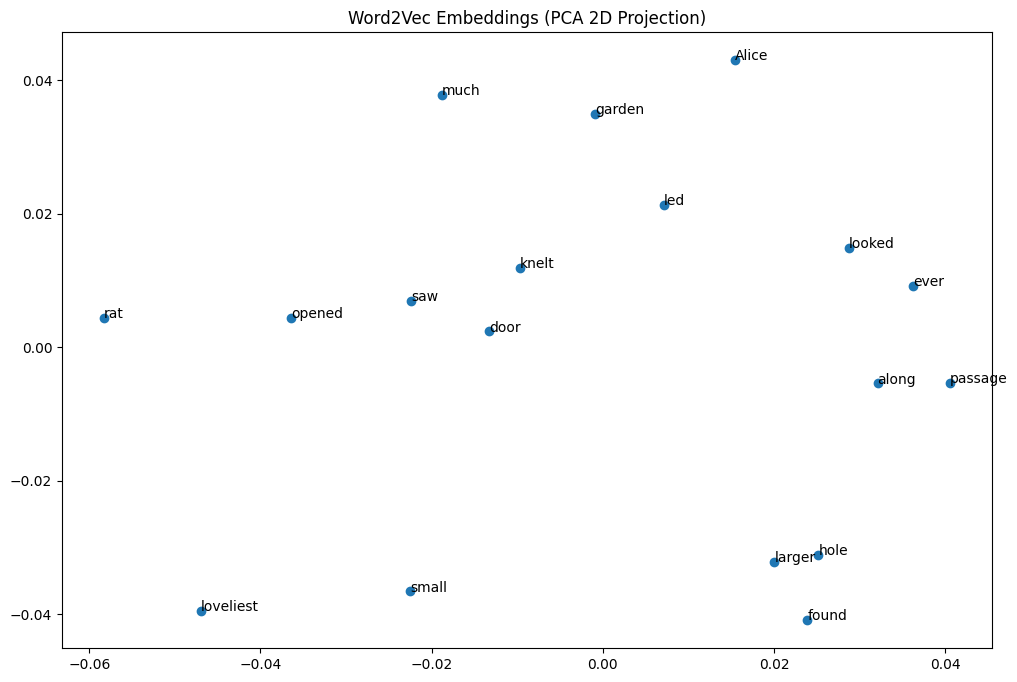

In [15]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

X = model.wv.vectors

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec Embeddings (PCA 2D Projection)")
plt.show()
